In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/final_med_gulf.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,5,7,8,9,10,11,13,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
index = df.index
df = df.drop(index[203101:])

In [103]:
df.head(2)

,Unnamed: 0,SN,Provider Pin,Patient ID,DOB[HCP],Gender[HCP],Claim Reference,Claim Occurence Date,Service Type,Service Provider Code,...,Benefit Code,Benefit Description,Policy Number,Length of Stay [Hospitalized],Duration of Treatment [days-supply],Practioner ID,Speciality Code,Speciality Description,anomaly_sk,anomely
0,0,1.0,2734770.25,107384075.1,30/04/1982,Male,70006.0,24/02/2022,imaging,code: 05060119,...,H-OP,Out Patient,1067425.923,NaN,1 d \r\n,10RM0310334,NaN,NaN,[0],0
1,1,2.0,2734770.25,109414199.9,14/06/1996,Male,70007.0,24/02/2022,laboratory,code: 02012015,...,H-OP,Out Patient,1067425.923,NaN,NaN,01RM9980,NaN,NaN,[0],0


In [4]:
correlations = df.corr()['anomely']

# Print the correlations
print(correlations)

Unnamed: 0                     0.028258
SN                             0.028258
Provider Pin                  -0.034407
Claim Reference                0.030639
Nphies Standard Description         NaN
Requested Quantity             0.000044
Unit Price                     0.010256
Patient Share                  0.018577
Paid                           0.004535
Policy Number                 -0.038901
anomely                        1.000000
Name: anomely, dtype: float64


In [5]:
list(df.columns)

['Unnamed: 0',
 'SN',
 'Provider Pin',
 'Patient ID',
 'DOB[HCP]',
 'Gender[HCP]',
 'Claim Reference',
 'Claim Occurence Date',
 'Service Type',
 'Service Provider Code',
 'Service Description',
 'Nphies Standard Code',
 'Nphies Standard Description',
 'Service Date',
 'Requested Quantity',
 'Unit Price',
 'Patient Share',
 'Paid',
 'Principal Diagnosis Code AM',
 'Principal Diagnosis Description',
 'Secondary Diagnosis Code',
 'Secondary Diagnosis Description',
 'Discharge Diagnosis Code',
 'Discharge Diagnosis Description',
 'Other Diagnosis Code',
 'Other Diagnosis Description',
 'Benefit Code',
 'Benefit Description',
 'Policy Number',
 'Length of Stay [Hospitalized]',
 'Duration of Treatment [days-supply]',
 'Practioner ID',
 'Speciality Code',
 'Speciality Description',
 'anomaly_sk',
 'anomely']

In [25]:
# Calculate the number of rows to drop
percentage = 0.98
n_rows = int(percentage * len(df))

# Randomly select the rows to drop
rows_to_drop = df.sample(n=n_rows)

# Drop the selected rows from the DataFrame
df = df.drop(rows_to_drop.index)

In [6]:
df = df.drop(['Patient ID',
              'SN',
              'Provider Pin',
              'Claim Occurence Date',
              'Service Type',
              'Service Provider Code',
              'Service Description',
              'Nphies Standard Code',
              'Nphies Standard Description',
              'Service Date',
              'Principal Diagnosis Code AM',
              'Secondary Diagnosis Code',
              'Secondary Diagnosis Description',
              'Discharge Diagnosis Code',
              'Discharge Diagnosis Description',
              'Other Diagnosis Code',
              'Other Diagnosis Description',
              'Benefit Code',
              'Benefit Description',
              'Policy Number',
              'Duration of Treatment [days-supply]',
              'Practioner ID',
              'Length of Stay [Hospitalized]',
              'Speciality Code',
              'Speciality Description',
              'DOB[HCP]'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203101 entries, 0 to 203100
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       203101 non-null  int64  
 1   Gender[HCP]                      203101 non-null  object 
 2   Claim Reference                  203101 non-null  float64
 3   Requested Quantity               203101 non-null  float64
 4   Unit Price                       203101 non-null  float64
 5   Patient Share                    203101 non-null  float64
 6   Paid                             203101 non-null  float64
 7   Principal Diagnosis Description  203101 non-null  object 
 8   anomaly_sk                       203101 non-null  object 
 9   anomely                          203101 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 17.0+ MB


In [8]:
# Create a list of columns to keep
cols_to_keep = []

# Loop through the columns in the DataFrame
for col in df.columns:
    # Check the data type of the column
    if df[col].dtype != 'object':
        # If the column is numeric, add it to the list of columns to keep
        cols_to_keep.append(col)

# Create a new DataFrame with only the columns to keep
df = df[cols_to_keep]

In [9]:
df

,Unnamed: 0,Claim Reference,Requested Quantity,Unit Price,Patient Share,Paid,anomely
0,0,70006.00000,1.0,165.375,14.057,126.512,0
1,1,70007.00000,1.0,26.775,0.000,20.483,0
2,2,70007.00000,1.0,26.775,0.000,20.483,0
3,3,70007.00000,1.0,21.840,0.000,16.708,0
4,4,70007.73333,1.0,24.255,0.000,18.555,0
...,...,...,...,...,...,...,...
203096,203096,21628.60000,1.0,22.050,2.481,14.056,0
203097,203097,42120.66667,1.0,33.075,4.217,23.897,0
203098,203098,42120.80000,1.0,16.800,2.142,12.138,0
203099,203099,42120.86667,1.0,33.075,4.217,23.897,0


In [10]:
df.describe()

,Unnamed: 0,Claim Reference,Requested Quantity,Unit Price,Patient Share,Paid,anomely
count,203101.000000,203101.000000,203101.000000,203101.000000,203101.000000,203101.000000,203101.000000
mean,101550.000000,62650.263133,1.542746,19.579246,1.300112,14.475462,0.004697
std,58630.352849,74211.410098,5.271795,92.143715,3.822829,87.025683,0.068375
min,0.000000,2.400000,0.200000,0.000000,-0.001000,0.000000,0.000000
25%,50775.000000,20909.866670,1.000000,3.580000,0.000000,0.000000,0.000000
50%,101550.000000,39363.133330,1.000000,9.670000,0.323000,5.440000,0.000000
75%,152325.000000,69569.600000,1.000000,20.100000,1.866000,14.992000,0.000000
max,203100.000000,329337.666700,999.000000,9920.400000,1003.745000,9920.400000,1.000000


In [11]:
from sklearn import preprocessing

# Create a label encoder object
le = preprocessing.LabelEncoder()

# Iterate over all the columns of the DataFrame
for col in df.columns:
    # If the column is a string, apply the label encoder
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# Apply the scale function to the DataFrame
data_scaled = preprocessing.scale(df)

In [12]:
data = data_scaled

In [22]:
# Import the necessary modules
import numpy as np
from sklearn.decomposition import PCA

# Use the isnan() and isinf() functions to identify invalid values
invalid_mask = np.isnan(data) | np.isinf(data)

# Use the mask to remove the invalid values from the data
data_valid = data[~invalid_mask]

# Reshape the data to convert it from a 1D array to a 2D array
data_valid = data_valid.reshape(-1, 1)

# Create a PCA object with n_components=1
pca = PCA(n_components=1)
# Fit the PCA model to the valid data and transform it
principalComponents = pca.fit_transform(data_valid)

In [23]:
data_valid

array([[-1.73204228],
       [ 0.09911892],
       [-0.102953  ],
       ...,
       [ 0.22022703],
       [-0.02685952],
       [-0.06869744]])

In [19]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
principalDf

#We create this Dataframe so we can add the PCA metrics to our original dataset.

,principal component 1
0,-1.732042
1,0.099119
2,-0.102953
3,1.582269
4,3.337036
...,...
1421702,-0.102953
1421703,-0.030162
1421704,0.220227
1421705,-0.026860


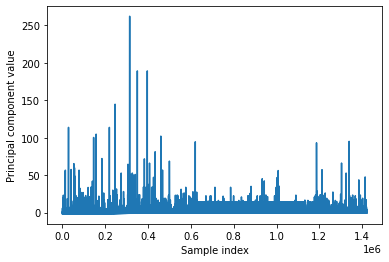

In [95]:
# Import the necessary modules
import matplotlib.pyplot as plt

# Extract the first principal component
principal_component = principalComponents[:, 0]

# Plot the principal component
plt.plot(principal_component)
plt.xlabel("Sample index")
plt.ylabel("Principal component value")
plt.show()


In [96]:
from sklearn.cluster import KMeans
kmeans = KMeans(4)
kmeans.fit(principalComponents)
clusters_new = principalDf.copy()
clusters_new['cluster_pred'] = kmeans.fit_predict(principalComponents)

In [97]:
df3 = pd.concat([df, principalDf], axis=0)

In [98]:
df3.to_csv('principal component.csv')

In [99]:
df3

,Unnamed: 0,Claim Reference,Requested Quantity,Unit Price,Patient Share,Paid,anomely,principal component 1
0,0.0,70006.00000,1.0,165.375,14.057,126.512,0.0,NaN
1,1.0,70007.00000,1.0,26.775,0.000,20.483,0.0,NaN
2,2.0,70007.00000,1.0,26.775,0.000,20.483,0.0,NaN
3,3.0,70007.00000,1.0,21.840,0.000,16.708,0.0,NaN
4,4.0,70007.73333,1.0,24.255,0.000,18.555,0.0,NaN
...,...,...,...,...,...,...,...,...
1421702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.102953
1421703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030162
1421704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220227
1421705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.026860
